# Session6: Logistic Regression Quest
‘breast cancer’ 데이터셋을 활용하여 radius 변수를 기준으로 breast cancer 양성/음성을 분류하는 로지스틱 회귀분석 모델을 만들고 이를 시각화해주세요.<br>
Radius 길이가 20, 0.1일 때의 결과를 해석해주세요!<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt # 기본적인 그래프 그리기
import seaborn as sns # Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
from sklearn.datasets import load_breast_cancer #데이터 임포트

breast_cancer = load_breast_cancer()

#data와 feature_names 확인
print(breast_cancer.data)
print(breast_cancer.feature_names)
print(list(breast_cancer.feature_names).index('mean radius'))

print(list(breast_cancer.feature_names).index('worst radius'))


[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
0
20


In [2]:
#target_names, target 확인

print(breast_cancer.target_names)
print(breast_cancer.target)

#0은 악성종양, 1은 양성종양

['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1

In [3]:
#로지스틱회귀 패키지 임포트

from sklearn.linear_model import LogisticRegression

## mean_radius를 이용하여 malignant/benign 여부 확인

In [4]:
#data 중 mean_radius 가져오기
x_mean_radius = breast_cancer.data[:,0].reshape(-1,1)

#target 데이터가 바이너리형이므로 그대로 사용
y = breast_cancer.target

print(x_mean_radius)

[[17.99 ]
 [20.57 ]
 [19.69 ]
 [11.42 ]
 [20.29 ]
 [12.45 ]
 [18.25 ]
 [13.71 ]
 [13.   ]
 [12.46 ]
 [16.02 ]
 [15.78 ]
 [19.17 ]
 [15.85 ]
 [13.73 ]
 [14.54 ]
 [14.68 ]
 [16.13 ]
 [19.81 ]
 [13.54 ]
 [13.08 ]
 [ 9.504]
 [15.34 ]
 [21.16 ]
 [16.65 ]
 [17.14 ]
 [14.58 ]
 [18.61 ]
 [15.3  ]
 [17.57 ]
 [18.63 ]
 [11.84 ]
 [17.02 ]
 [19.27 ]
 [16.13 ]
 [16.74 ]
 [14.25 ]
 [13.03 ]
 [14.99 ]
 [13.48 ]
 [13.44 ]
 [10.95 ]
 [19.07 ]
 [13.28 ]
 [13.17 ]
 [18.65 ]
 [ 8.196]
 [13.17 ]
 [12.05 ]
 [13.49 ]
 [11.76 ]
 [13.64 ]
 [11.94 ]
 [18.22 ]
 [15.1  ]
 [11.52 ]
 [19.21 ]
 [14.71 ]
 [13.05 ]
 [ 8.618]
 [10.17 ]
 [ 8.598]
 [14.25 ]
 [ 9.173]
 [12.68 ]
 [14.78 ]
 [ 9.465]
 [11.31 ]
 [ 9.029]
 [12.78 ]
 [18.94 ]
 [ 8.888]
 [17.2  ]
 [13.8  ]
 [12.31 ]
 [16.07 ]
 [13.53 ]
 [18.05 ]
 [20.18 ]
 [12.86 ]
 [11.45 ]
 [13.34 ]
 [25.22 ]
 [19.1  ]
 [12.   ]
 [18.46 ]
 [14.48 ]
 [19.02 ]
 [12.36 ]
 [14.64 ]
 [14.62 ]
 [15.37 ]
 [13.27 ]
 [13.45 ]
 [15.06 ]
 [20.26 ]
 [12.18 ]
 [ 9.787]
 [11.6  ]
 [14.42 ]


In [5]:
#모델 피팅
log_reg = LogisticRegression()
result = log_reg.fit(x_mean_radius,y)

In [6]:
#모델로 mean_radius가 15일 때 predict 실행해보기
result.predict_proba([[15]])

array([[0.56228462, 0.43771538]])

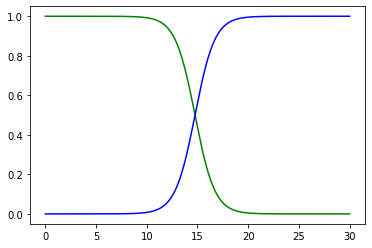

In [7]:
X_new = np.linspace(0, 30, 1000).reshape(-1,1) #plotting을 위한 array 만들기
y_prob = result.predict_proba(X_new) #만든 array를 넣어서 앞에 만든 모델로 예측하기
plt.plot(X_new, y_prob[:,1], color='green', label='benign')
plt.plot(X_new, y_prob[:,0], color='blue', label='malignant')

#mean_radius에 따라 - 초록색은 양성종양, 파란색은 악성종양일 확률

## worst_radius를 이용하여 malignant/benign 여부 확인

In [8]:
#data 중 mean_radius 가져오기
x_worst_radius = breast_cancer.data[:,20].reshape(-1,1)

#target 데이터가 바이너리형이므로 그대로 사용
y2 = breast_cancer.target

print(x_worst_radius)

[[25.38 ]
 [24.99 ]
 [23.57 ]
 [14.91 ]
 [22.54 ]
 [15.47 ]
 [22.88 ]
 [17.06 ]
 [15.49 ]
 [15.09 ]
 [19.19 ]
 [20.42 ]
 [20.96 ]
 [16.84 ]
 [15.03 ]
 [17.46 ]
 [19.07 ]
 [20.96 ]
 [27.32 ]
 [15.11 ]
 [14.5  ]
 [10.23 ]
 [18.07 ]
 [29.17 ]
 [26.46 ]
 [22.25 ]
 [17.62 ]
 [21.31 ]
 [20.27 ]
 [20.01 ]
 [23.15 ]
 [16.82 ]
 [20.88 ]
 [24.15 ]
 [20.21 ]
 [20.01 ]
 [15.89 ]
 [13.3  ]
 [14.99 ]
 [15.53 ]
 [15.93 ]
 [12.84 ]
 [24.09 ]
 [17.38 ]
 [16.23 ]
 [22.82 ]
 [ 8.964]
 [15.67 ]
 [13.76 ]
 [15.15 ]
 [12.98 ]
 [14.67 ]
 [13.1  ]
 [20.6  ]
 [18.1  ]
 [12.84 ]
 [26.14 ]
 [17.87 ]
 [14.23 ]
 [ 9.507]
 [11.02 ]
 [ 9.565]
 [17.67 ]
 [10.01 ]
 [17.09 ]
 [17.31 ]
 [10.41 ]
 [12.33 ]
 [10.31 ]
 [13.46 ]
 [24.86 ]
 [ 9.733]
 [23.32 ]
 [16.57 ]
 [14.11 ]
 [19.77 ]
 [14.08 ]
 [22.39 ]
 [23.37 ]
 [14.24 ]
 [13.11 ]
 [15.53 ]
 [30.   ]
 [20.33 ]
 [13.67 ]
 [22.93 ]
 [16.21 ]
 [24.56 ]
 [13.83 ]
 [16.34 ]
 [16.11 ]
 [16.43 ]
 [16.36 ]
 [15.1  ]
 [18.23 ]
 [24.22 ]
 [12.83 ]
 [10.92 ]
 [13.06 ]
 [16.33 ]


In [9]:
#모델 피팅
log_reg = LogisticRegression()
result2 = log_reg.fit(x_worst_radius,y2)

In [10]:
#모델로 worst_radius가 20일 때 predict 실행해보기
result2.predict_proba([[20]])

array([[0.97900898, 0.02099102]])

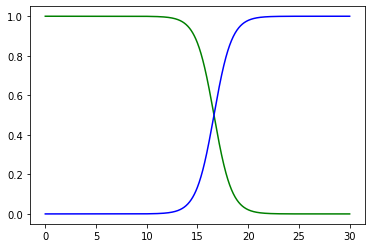

In [11]:
X_new2 = np.linspace(0, 30, 1000).reshape(-1,1) #plotting을 위한 array 만들기
y_prob2 = result2.predict_proba(X_new2) #만든 array를 넣어서 앞에 만든 모델로 예측하기
plt.plot(X_new2, y_prob2[:,1], color='green', label='benign')
plt.plot(X_new2, y_prob2[:,0], color='blue', label='malignant')

#mean_radius에 따라 - 초록색은 양성종양, 파란색은 악성종양일 확률

## 결론

mean_radius는 대략 10이하면 양성종양, 20이상이면 악성종양일 확률이 높다.
worst_radius는 대략 13이하면 양성종양, 22이상이면 악성종양일 확률이 높다.